In [1]:
using Plots
plot();
using Distributions
using Statistics

In [2]:
σw=1
σz=2
n=1000
ϕ=0.5

Z=rand(Normal(0,σz), n+1)
S=rand(Normal(0,σw), n)
X=@.Z[2:end]+ϕ*Z[1:end-1]+S;

In [3]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

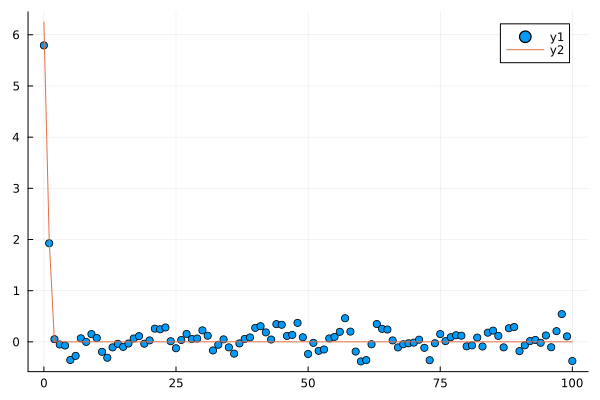

In [4]:
scatter(0:100,h->γ(X,h))
plot!([0,1,2,100],[(σw^2+σz^2)*(1+ϕ^2),ϕ*σz^2,0,0])

#  Zad 3

In [5]:
σz=2
n=1000
ϕ=0.5
σu=σz*ϕ

Z=rand(Normal(0,σz), n+1)
X=@.Z[2:end]+ϕ*Z[1:end-1];

U=rand(Normal(0,σu), n+1)
Y=@.U[2:end]+U[1:end-1]/ϕ;

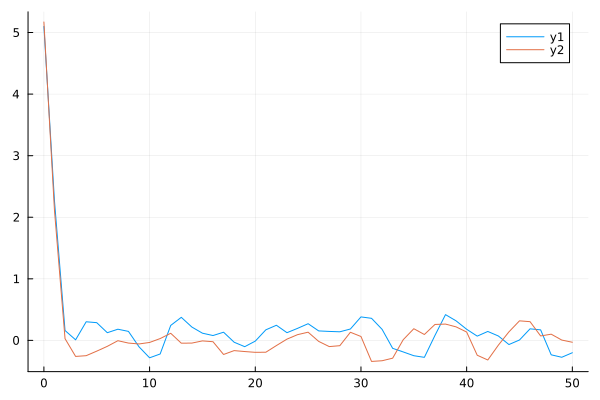

In [6]:
plot(0:50,h->γ(X,h))
plot!(0:50,h->γ(Y,h))

# Zad 4

In [7]:
#using SingularSpectrumAnalysis
using LsqFit

In [8]:
n=1000
θ=0.5
σ=1
a₁,a₂=0.05,5
b₁,b₂=2,50

m(t)=a₁*t+a₂
s(t)=b₁*sin(t*(2π/b₂))

Z=rand(Normal(0,σ), n+1)
Y=@.Z[2:end]+θ*Z[1:end-1];

X=@. Y+ s.(1:n) + m.(1:n);

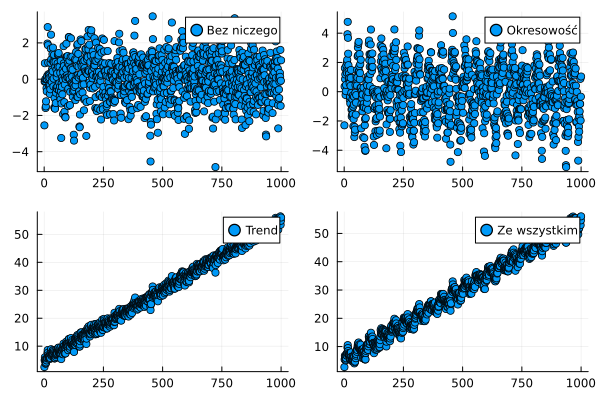

In [9]:
plot(scatter(Y, label="Bez niczego"),scatter(Y .+ s.(1:n), label="Okresowość"),scatter(Y .+ m.(1:n), label="Trend"), scatter(X, label="Ze wszystkim"))

In [46]:
fit_trend(X,1)

LoadError: UndefVarError: fit_trend not defined

In [10]:
@. model(x,p)= p[1]*x+p[2]

model (generic function with 1 method)

In [11]:
fits=curve_fit(model,1:n,X,[1.,1.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.04950934789970432, 5.262028435375283], [2.5578234250236216, -0.10012938407279126, -1.3525874726021936, -0.6017503400586319, -0.9183431294713227, 0.4818231123621084, 0.2202325879363496, -0.20781908530032212, -1.5469114422666683, -1.1507696740539437  …  2.1595741137221367, 2.503140181908563, 1.4621812220149124, 1.1192821160382351, 0.6034612572518441, 0.6063639126982849, -1.1061628568428787, 1.7407012360220122, 0.11081434726845885, -1.268095306539088], [1.0000000000235538 0.9999999999967384; 1.9999999999737708 0.9999999999967384; … ; 998.9999999994758 1.0000000000246125; 999.9999999994993 1.0000000000246125], true, Float64[])

In [12]:
fits.param

2-element Vector{Float64}:
 0.04950934789970432
 5.262028435375283

In [13]:
W=X.- model.(1:n,Ref(fits.param));

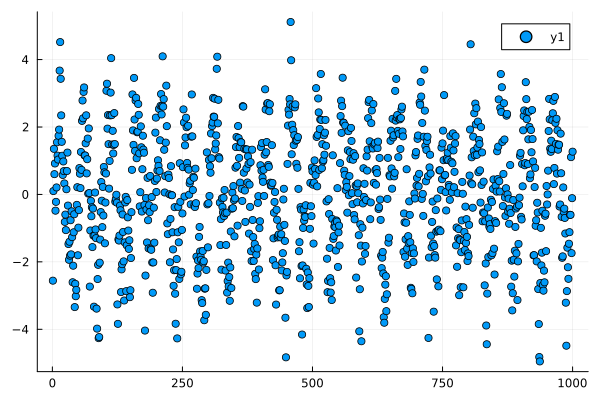

In [14]:
scatter(W)

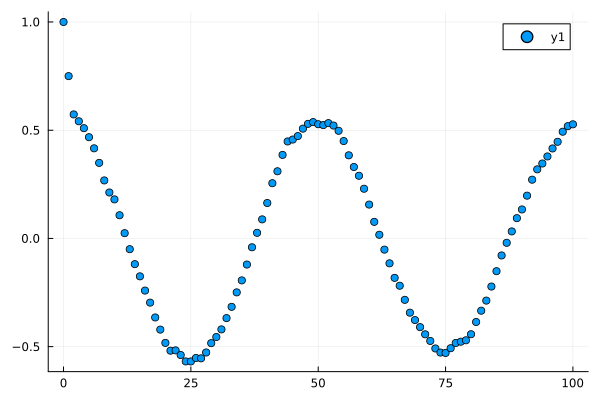

In [15]:
scatter(0:100,h->γ(W,h)/γ(W,0))

In [64]:
@. model2(x,p)=p[1]*sin(x*(2π/p[2]))

model2 (generic function with 1 method)

In [65]:
fit2=curve_fit(model2,1:n,W,[3.,50.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([2.0712584498525346, 50.007031761169564], [0.4748897552693873, -0.7676043268001183, -0.07949622356709829, 0.4733979519807777, -0.5664245499855036, -0.022282806090956786, -0.5899935469840898, -2.6583894922503326, -1.6888200623976704, -1.944936228064815  …  0.998277804109029, -0.5053661979050028, -2.738158580754697, -1.1026308742611615, 0.8348313568689854, -0.7774683329788366, -0.32114800281247036, -1.3765858296327544, -0.8238926467341923, 1.9975840727350025], [0.125315702619604 -0.005163151419530195; 0.24865565677714063 -0.01008144668938021; … ; -0.1428261888635504 -5.1456707356766325; -0.017669338791507217 -5.203363428671632], true, Float64[])

In [66]:
fit2.param

2-element Vector{Float64}:
  2.0712584498525346
 50.007031761169564

In [67]:
V=W .-model2.(1:n,Ref(fit2.param));

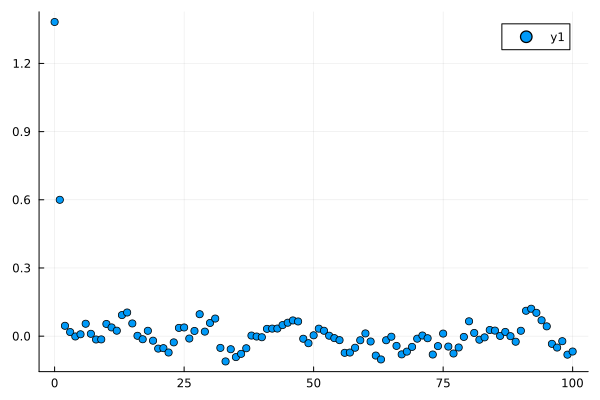

In [68]:
scatter(0:100,h->γ(V,h))

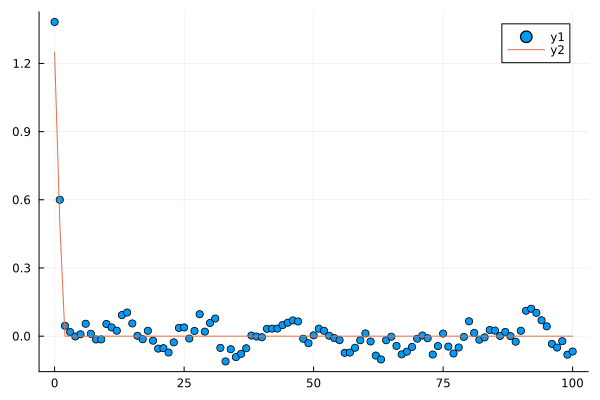

In [59]:
plot!([0,1,2,100],[(σ^2)*(1+θ^2),θ*σ^2,0,0])

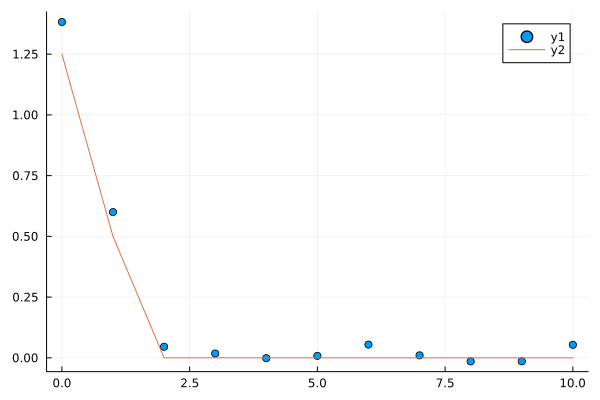

In [60]:
scatter(0:10,h->γ(V,h))
plot!([0,1,2,10],[(σ^2)*(1+θ^2),θ*σ^2,0,0])